In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img1 = 'img1.jpg'
img2 = 'img2.jpg'

In [19]:

def create_hybrid_image(img_low_path, img_high_path, cutoff_low, cutoff_high):

    img1 = cv2.imread(img_low_path)
    img2 = cv2.imread(img_high_path)
    
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    
    low_freq = cv2.GaussianBlur(img1, (0, 0), sigmaX=cutoff_low, sigmaY=cutoff_low)

   
    img2_blurred = cv2.GaussianBlur(img2, (0, 0), sigmaX=cutoff_high, sigmaY=cutoff_high)
    high_freq = img2 - img2_blurred

    hybrid = low_freq + high_freq

    hybrid_clipped = np.clip(hybrid, 0, 255).astype(np.uint8)
    
    return hybrid_clipped


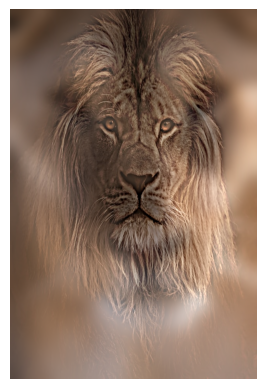

True

In [20]:

result = create_hybrid_image(img1, img2, cutoff_low=18, cutoff_high=8)

# Display
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save
cv2.imwrite('hybrid_output.jpg', result)